# Python-MLearning: Portuguese Banking Data using Logistic Regression (LR) and PCA Reduced Dimension
## MODELING
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 15, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I IMPORT REQUIRED PACKAGES

In [11]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

#sklearn.linear_model.LogisticRegression
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# II LOADING DATA

In [12]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic1'

In [13]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'bankmarket.csv',
 'bankmarket_final.csv',
 'Link to here.txt',
 'Links to LR1 GITHUBE and Nbviewer.txt',
 'Nueva carpeta',
 'PYTHON-MLearning_LR1_Exploratory_FEngineering.ipynb',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR1_Modeling.ipynb',
 'To Put in the GitHube Menu.txt']

In [14]:
# read csv (comma separated value) into data
df=pd.read_csv('bankmarket_final.csv')
print(df.shape)
print(df.columns)

(41188, 62)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_

In [15]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp_var_rate                     41188 non-null float64
cons_price_idx                   41188 non-null float64
cons_conf_idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr_employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null int64
job_blue-collar                  41188 non-null int64
job_entrepreneur                 41188 non-null int64
job_housemaid                    41188 non-null int64
job_management                   41188 non-null int64
job_retired      

In [17]:
y_data = df['y']
X_data = df.drop('y', axis=1)                  
df.shape, y_data.shape, X_data.shape

((41188, 62), (41188,), (41188, 61))

# III MODELING

## Train and Validation Datasets

In [18]:
#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 61), (12357, 61), (28831,), (12357,))

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

X_train.shape, X_test.shape

((28831, 61), (12357, 61))

## Reduce dimension using PCA

### Reduce dimension general analysis

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
data_sc = sc.fit_transform(X_data)  

#Reduce dimension into 99% information
pca = PCA(0.95)
data_pca = pca.fit_transform(data_sc)
data_sc.shape, data_pca.shape

((41188, 61), (41188, 40))

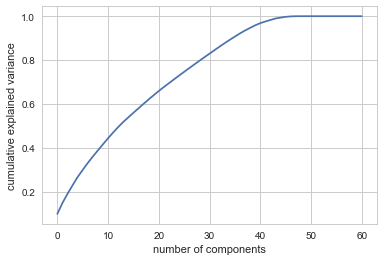

In [79]:
#plot to visualize % of total variance accumulated by the components
pca = PCA().fit(data_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0.5,1,'Projection on the Two First Principal Components ')

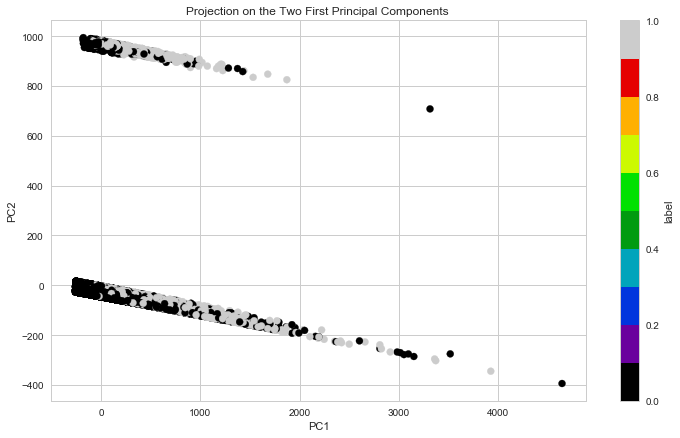

In [26]:
#plot of two first components
plt.subplots(nrows=1, ncols=1, figsize=(12,7))
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_data, cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar(label='label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')

### Reduce dimension into 95% information

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)
data_pca = pca.transform(X_data)

X_train_pca.shape, X_test_pca.shape, data_pca.shape

((28831, 40), (12357, 40), (41188, 40))

## Build Model

## Checking Global Model Significance

In [43]:
from __future__ import print_function
import statsmodels.api as sm
glm_binom = sm.GLM(y_data, data_pca, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

C:\Users\Alvaro\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                41188
Model:                            GLM   Df Residuals:                    41148
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -24974.
Date:                Wed, 15 Aug 2018   Deviance:                       49948.
Time:                        11:17:00   Pearson chi2:                 1.28e+06
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3330      0.010     34.630      0.000       0.314       0.352
x2             0.1190      0.008     14.732      0.0

The p_value for a large part of the predictor variables is less than 0.05. Therefore, assuming a classic risk of 5% we can accept that the model is <u><i>globally valid</i></u> since most of the predictor variables are significantly valid for the model.

## What values for the model's hyperparameters would be selected?

In [54]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'C': np.arange(0.5, 3, 0.5),      
           "solver" : ['newton-cg', 'lbfgs']}

# Instantiate a Logistic Regression classifier:
lr = LogisticRegression( n_jobs=-1, random_state=7) 

# Instantiate the RandomizedSearchCV object: rf_cv
kfold = StratifiedKFold(n_splits=10, random_state=0)
lr_cv = RandomizedSearchCV(lr, param_dist, scoring = 'accuracy', n_jobs=-1, cv=kfold)

# Fit it to the data
lr_cv.fit(data_pca, y_data)
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:01:15.174299 seconds.


In [55]:
# Print the tuned parameters and score
print("Tuned LR Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned LR Parameters: {'solver': 'newton-cg', 'C': 2.5}
Best score is 0.9092211323686511


## Using the best parameters to Fit, Evaluate, and Make predictions

## Fitting the Model

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=2.5, solver='newton-cg', n_jobs=-1, random_state=0)
logreg.fit(X_train_pca, y_train)

LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluating the Model

#### <font color=orange><i>Getting Accuracy and Confusion Matrix</i></font>

In [57]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(logreg.score(X_train_pca,y_train),4)) # accuracy 

With LR train datasets () accuracy is:  0.9111


In [58]:
predictions = logreg.predict(X_test_pca)
print('Accuracy based on X_test_pca, y_test: ',accuracy_score(y_test, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test, predictions))
print('With LR train datasets () accuracy is: ',round(logreg.score(X_train_pca,y_train),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy based on X_test_pca, y_test:  0.907420895039249

Confusion Matrix:
  [[10639   326]
 [  818   574]]
With LR train datasets () accuracy is:  0.9111
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10965
          1       0.64      0.41      0.50      1392

avg / total       0.90      0.91      0.90     12357



#### <font color=orange><i>Plotting the ROC Curve</i></font>

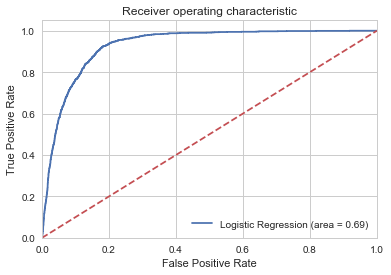

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_pca))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Making Predictions

### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [60]:
predictions = cross_val_predict(logreg, X_train_pca, y_train, cv=10)
print('Prediction: {}', predictions)

Prediction: {} [0 0 0 ... 0 0 0]


### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset. In our case, the new dataset is the X_test one.

In [80]:
# train your model using all data.
startTime = datetime.now()
logreg.fit(data_pca, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:07.585434 seconds.


In [81]:
predictions = logreg.predict(X_test_pca)
print('Prediction: {}', predictions)

Prediction: {} [0 0 0 ... 0 0 0]


<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 15, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>